# Introduction

Thailand held a general election on May $14^{th}$, $2023$ to elect $500$ members of the House of Representative (MP). The MPs are elected from two systems: $400$ from a single-member constituency (แบ่งเขต) and $100$ from a party-list system. As Thai people had grown increasingly dissatisfied with Prime Minister Prayut Chan-o-cha — who orchestrated a coup in 2014 — and his cabinet, the election was highly anticipated as a turning point towards Thailand's brighter future. The result stunned Thai citizens and political pundits alike. Move Forward Party won the most seats — $112$ constituency and $39$ party-list seats, followed by Pheu Thai Party, which won $112$ constituency and $29$ party list seats. Moreover, roughly $25$ million voters voted in favor of then-opposition parties in the party-list ballot, a strong rebuke against the incumbent parties. Moreover, $75.22\%$ of eligible voters, which translates to almost $40$ million voters, cast their ballot. However,  
However, to better understand the phenomenon,

- Discuss divided loyalty by Ken and Napat. 
- Discuss interesting observation about HHI.
- Margin of victory per political leanings
sentatives (HR) are elected from two systems: 400 from single-member constituency (bang
ket) and 100 from party-list. The result suggested an overwhelming victory for the so-called
pro-democracy coalition (8 parties), which receives more than 74% of the votes for party-list
ballot and 312 member of parliament (MP) seats. This translates to

een observers of the country’s politics wondered whether the longtime incumbent prime minister Prayut Chan-o-cha – who seized power in a 2014 coup – would be able to hang on amid growing discontent and an invigorated opposition movement. While many hoped the progressives would make ground, the results were truly stunning. Almost 40 million Thais – a national record – weighed in at the ballot box. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all dataframe from 9geek website.
# c = constituency; candi = candidate
pwd = "9geek_dataset/"
info_c9 = pd.read_csv(pwd + "info_constituency9.csv")
info_party9 = pd.read_csv(pwd + "info_party9.csv")
info_province9 = pd.read_csv(pwd + "info_province9.csv")
result_partylist9 = pd.read_csv(pwd + "result_partylist9.csv")
result_cstatus9 = pd.read_csv(pwd + "result_constituency_status9.csv")
result_candi9 = pd.read_csv(pwd + "result_candidate9.csv")

# Read my personal dataframe
info_province = pd.read_csv("PL_info_province.csv")
result_candi = pd.read_csv("PL_result_constituencies_CandidateConst.csv")
result_overall = pd.read_csv("PL_result_constituencies_Overall.csv").rename(columns = {"Unnamed: 0":"cons_id"})
result_overall = result_overall.drop(columns = result_overall.columns.tolist()[4:]).set_index("cons_id")

In [3]:
# Create a map between party ID, color, and name
id_name = dict(zip(info_party9["id"], info_party9["name"]))
party_color_map = dict(zip(info_party9["id"], info_party9["color"]))

# Disclaimer on terms

Thai election is often viewed through binary lens — progressive versus conservative; pro-democracy versus pro-authoritarian; among others. I find these terms self-righteous and counterproductive in political discussions. Since every Member of Parliament (MP) is elected through the same electoral rules mandated by the 2017 Constitution, which criteria shall we use to determine how **authoritarian** an MP is? What makes those proclaiming to wear the mantle of democracy more democratic than others? That being said, for the sake of convention, I will, albeit begrudgingly, use the progressive-conservative lens to analyze this election result. 

# Results

## Margin of victory per ideological camp

Is there a collusion between parties from the same ideological camp? What's the margin of victory of each party across constituents with different ideological leanings?

In [8]:
# The mp_app_vote is not properly ordered in the modified dataset. Hence, I re-arranged the mp_app_rank.
result_candi = result_candi.sort_values(by = ["cons_id", "mp_app_vote"],ascending=False)
result_candi["mp_app_rank"] = result_candi.groupby("cons_id")["mp_app_vote"].rank(method="dense",ascending=False)
# Recalculate the percent each candidate obtains
result_candi["percent"] = result_candi["mp_app_vote"].div(result_candi.groupby("cons_id")["mp_app_vote"].transform(lambda x: x.sum()/100))
# Choose 3 decimals because assuming 100,000 voters per constituency, 0.001% = 1 voter. 
result_candi["percent"] = np.around(result_candi["percent"],decimals = 3)

# Check results
result_candi

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,percent,party_id
4770,YST_3,YST_3_5,1.0,38074,37.961,709
4771,YST_3,YST_3_2,2.0,25205,25.130,705
4772,YST_3,YST_3_9,3.0,14564,14.521,726
4773,YST_3,YST_3_10,4.0,13622,13.582,707
4774,YST_3,YST_3_4,5.0,4963,4.948,743
...,...,...,...,...,...,...
8,ACR_1,ACR_1_1,9.0,459,0.455,706
9,ACR_1,ACR_1_2,10.0,234,0.232,769
10,ACR_1,ACR_1_13,11.0,212,0.210,761
11,ACR_1,ACR_1_12,12.0,127,0.126,742


In [9]:
# Create a map from each party to its ideological camp
cons_lst = [701, 706, 707, 709, 743, 763] # Democrat, Chatpattana Kla, Chatthaipattana, Bhumjaithai, PPRP, RTSC
prog_lst = [705,726,762,719,740,773] # Pheu Thai, MFP, Thai Sang Thai, Seri, Prachachat, Pheu Thai Ruam Palang
leaning_map = {id: "conservative" for id in cons_lst}
leaning_map.update({id: "progressive" for id in prog_lst})

# Summarize the leaning of each candidate in the constituency result
result_candi["leaning"] = result_candi["party_id"].map(leaning_map)

In [10]:
# Double-check constituency results
## 1. Do I have the right number of winners?
temp = result_candi[result_candi["mp_app_rank"] == 1]["party_id"].value_counts().to_frame()
temp["party_name"] = temp.index.map(id_name)
temp["leaning"] = temp.index.map(leaning_map)

## 2. Do I have the right number of constituency MP? 
## Result should give 162 conservatives and 238 progressives. 
result_candi[result_candi["mp_app_rank"] == 1]["leaning"].value_counts()

leaning
progressive     238
conservative    162
Name: count, dtype: int64

In [54]:
# Initialize a variable for two uncles
result_candi["two_uncle"] = result_candi["party_id"].map({743:True, 763:True}).fillna(False)
victory_df = pd.DataFrame(index = result_candi["cons_id"].unique(), 
                          columns = ["winner_id", "winner_name","winner_leaning","winner_percent","two_uncle_percent","margin"]) 

In [55]:
# Fill in the information about winners
victory_df["winner_id"] = result_candi.groupby("cons_id").nth(0)["party_id"].to_numpy()
victory_df["winner_name"] = victory_df["winner_id"].map(id_name)
victory_df["winner_leaning"] = victory_df["winner_id"].map(leaning_map)
victory_df["winner_percent"] = result_candi.groupby("cons_id").nth(0)["percent"].to_numpy()

# Fill in the margin of victory (difference in percent between the first and the second)
temp = result_candi.groupby("cons_id")
victory_df["margin"] = temp.nth(0)["percent"].to_numpy() - temp.nth(1)["percent"].to_numpy()

In [56]:
# If we categorize parties into two groups — conservative and progressive — and believe candidate constituency voters
# do not switch camp, we can see the degree of collusion between them.
temp = result_candi.groupby(["cons_id", "leaning"]).sum().reset_index()
temp = temp[temp["leaning"] == "progressive"]
temp = temp.set_index("cons_id")

# Create a dataframe of progressive percent per constituency
const_leaning = pd.DataFrame(index = temp.index.tolist(), columns = ["progressive_percent"])
const_leaning["progressive_percent"] = temp["percent"]
victory_df = victory_df.join(const_leaning)

In [57]:
# Calculate the percent that two uncles would have gained
two_uncle_df = result_candi.groupby(["cons_id","two_uncle"]).sum()["percent"].reset_index()
two_uncle_df = two_uncle_df[two_uncle_df["two_uncle"] == True].set_index("cons_id").drop(columns = ["two_uncle"])
victory_df = victory_df.join(two_uncle_df)
victory_df["two_uncle_percent"] = victory_df["percent"]
victory_df = victory_df.drop(columns = ["percent"])

In [79]:
# How many seats would MFP have won if the two uncle merge together? 
cond = np.logical_and(victory_df["winner_id"] == 726, victory_df["two_uncle_percent"].to_numpy() > victory_df["winner_percent"].to_numpy())
victory_df[cond]

,winner_id,winner_name,winner_leaning,winner_percent,two_uncle_percent,margin,progressive_percent
SPK_7,726,ก้าวไกล,progressive,35.842,43.296,10.707,55.633
PLK_5,726,ก้าวไกล,progressive,27.891,34.373,9.657,49.881
PKT_1,726,ก้าวไกล,progressive,30.045,38.344,6.742,36.823
CTI_1,726,ก้าวไกล,progressive,34.856,38.920,10.703,51.467
CCO_4,726,ก้าวไกล,progressive,32.129,45.801,9.032,52.348
CBI_2,726,ก้าวไกล,progressive,35.537,37.695,7.989,60.731
AYA_2,726,ก้าวไกล,progressive,27.405,28.987,0.661,42.502


In [103]:
# If the MFP were to be disbanded, how many seats would the party have retained had the other camp decided to collude?
MFP_dissolution_cond = np.logical_and(victory_df["winner_id"] == 726, 
                                      victory_df["winner_percent"].to_numpy() < 100-victory_df["progressive_percent"])
temp = victory_df[MFP_dissolution_cond].sort_values(["margin"])
temp[temp["progressive_percent"] < 55].shape[0]

19

In [77]:
victory_df

,winner_id,winner_name,winner_leaning,winner_percent,two_uncle_percent,margin,progressive_percent
YST_3,709,ภูมิใจไทย,conservative,37.961,5.578,12.831,41.726
YST_2,705,เพื่อไทย,progressive,47.503,1.592,10.878,94.327
YST_1,762,ไทยสร้างไทย,progressive,49.984,0.901,26.263,73.952
YLA_3,740,ประชาชาติ,progressive,34.914,34.269,7.542,57.023
YLA_2,740,ประชาชาติ,progressive,55.647,27.479,29.282,64.602
...,...,...,...,...,...,...,...
AYA_1,726,ก้าวไกล,progressive,39.954,7.710,5.257,56.158
ATG_2,709,ภูมิใจไทย,conservative,55.589,2.592,29.968,40.413
ATG_1,709,ภูมิใจไทย,conservative,52.935,2.625,28.246,43.446
ACR_2,709,ภูมิใจไทย,conservative,43.860,16.059,25.908,36.834


In [80]:
# Because matplotlib does not support Thai, I need to encode each party's name in English.
id_name[701] = "Democrat"
id_name[707] = "Chart Thai Pattana"
id_name[706] = "Chart Pattana Kla"
id_name[709] = "Bhumjaithai"
id_name[743] = "PPRP"
id_name[763] = "Ruam Thai Sang Chart"
id_name[705] = "Pheu Thai"
id_name[726] = "Move Forward"
id_name[762] = "Thai Sang Thai"
id_name[740] = "Prachachart"
id_name[719] = "Seri Ruam Thai"
id_name[769] = "Thai Pakdee"
id_name[773] = "Pheu Thai Ruampalang"

Text(0.5, 1.0, 'Scatterplot of margin of victory across constituency')

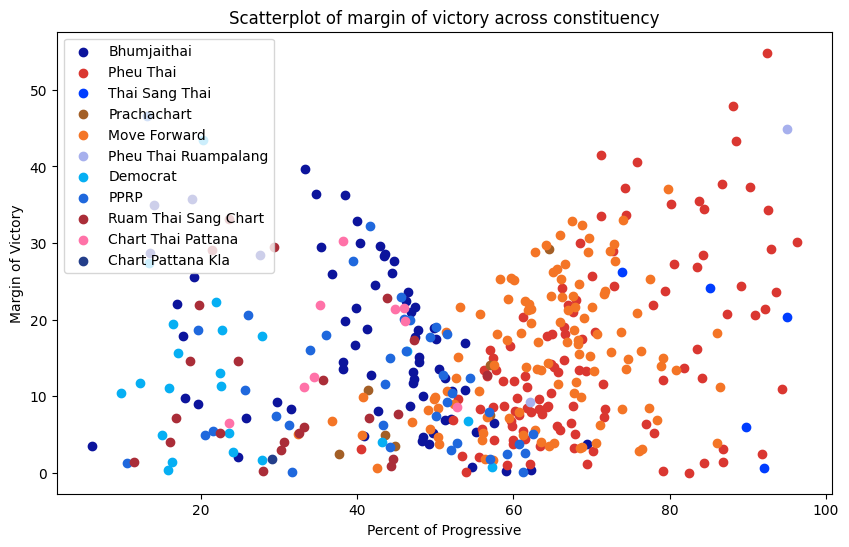

In [81]:
victory_df["winner_color"] = victory_df["winner_id"].map(party_color_map)
ax = plt.subplots(figsize = (10,6))
for winner_id in victory_df["winner_id"].unique():
    temp = victory_df[victory_df["winner_id"] == winner_id]  
    plt.scatter(temp["progressive_percent"], temp["margin"], c = party_color_map[winner_id], label=id_name[winner_id])
plt.xlabel("Percent of Progressive")
plt.ylabel("Margin of Victory")
plt.legend()
plt.title("Scatterplot of margin of victory across constituency")

# Analyze degree of concentration among political camps

In [145]:
# Major players
result_candi_major = result_candi.dropna(subset = ["leaning"]).copy()
result_candi_major["percent_same_camp"] =  result_candi_major["mp_app_vote"].div(result_candi_major.groupby(["cons_id","leaning"])["mp_app_vote"].transform(lambda x: x.sum()/100))

In [146]:
const_progp_map = dict(zip(victory_df.index.tolist(), victory_df["progressive_percent"]))
const_progp_map

{'YST_3': 41.726,
 'YST_2': 94.327,
 'YST_1': 73.952,
 'YLA_3': 57.023,
 'YLA_2': 64.602,
 'YLA_1': 44.823,
 'UTT_3': 80.185,
 'UTT_2': 70.471,
 'UTT_1': 63.263,
 'UTI_2': 43.6,
 'UTI_1': 33.354,
 'UDN_9': 83.497,
 'UDN_8': 79.165,
 'UDN_7': 84.44800000000001,
 'UDN_6': 89.714,
 'UDN_5': 90.865,
 'UDN_4': 86.82,
 'UDN_3': 94.991,
 'UDN_2': 83.503,
 'UDN_10': 92.529,
 'UDN_1': 71.044,
 'UBN_9': 92.019,
 'UBN_8': 48.288,
 'UBN_7': 55.949,
 'UBN_6': 89.062,
 'UBN_5': 47.95,
 'UBN_4': 71.66199999999999,
 'UBN_3': 62.099000000000004,
 'UBN_2': 54.249,
 'UBN_11': 47.34,
 'UBN_10': 94.962,
 'UBN_1': 86.822,
 'TRT_1': 61.028999999999996,
 'TRG_4': 15.818,
 'TRG_3': 27.82,
 'TRG_2': 13.134,
 'TRG_1': 22.42,
 'TAK_3': 33.952,
 'TAK_2': 50.015,
 'TAK_1': 49.324,
 'STN_2': 18.871,
 'STN_1': 27.56,
 'STI_4': 67.02,
 'STI_3': 52.903,
 'STI_2': 66.508,
 'STI_1': 71.627,
 'SSK_9': 62.208999999999996,
 'SSK_8': 46.774,
 'SSK_7': 88.52300000000001,
 'SSK_6': 64.791,
 'SSK_5': 64.42099999999999,
 'SSK_4'

In [177]:
# Calculate the percent square of shares that each party takes from voters within the same ideology camp
result_candi_major["percent_sq"] = np.square(result_candi_major["percent_same_camp"])
hhi_df = result_candi_major.groupby(["cons_id","leaning"]).sum()["percent_sq"].to_frame().reset_index()
hhi_df = hhi_df.rename({"percent_sq":"hhi"},axis=1)

# Convert the HHI dataframe into a pivot
hhi_df = hhi_df.pivot(index = "cons_id", columns = "leaning", values = "hhi")
hhi_df = hhi_df.rename({"conservative":"hhi_conservative", "progressive":"hhi_progressive"}, axis=1)
victory_df = victory_df.join(hhi_df)

In [269]:
# Find the party id of the runner up
victory_df["runner_up_id"] = result_candi.groupby("cons_id").nth(1)["party_id"].to_numpy()
victory_df["runner_up_name"] = victory_df["runner_up_id"].map(id_name)

# Find the party id of the first place from opposite ideological camp
wr_df = result_candi.dropna(subset = ["leaning"], axis = 0).groupby(["cons_id","leaning"]).nth(0)
wr_df = wr_df[wr_df["mp_app_rank"] > 1]

assert victory_df.index.tolist() == wr_df["cons_id"].tolist()
victory_df["opp_first_id"] = wr_df["party_id"].to_numpy()

Text(0.5, 1.0, 'Scatterplot of HHI index across constituency')

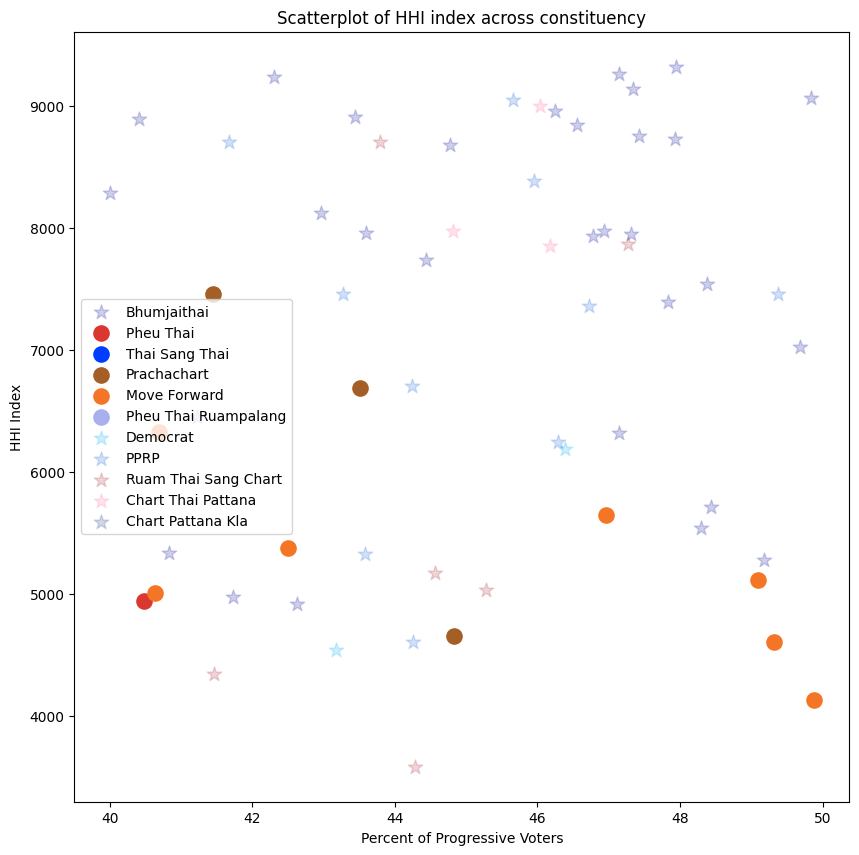

In [399]:
ax = plt.subplots(figsize = (10,10))
lb = 40
ub = 50
winner_size = 120
opp_first_alpha = 0.5
plot_opp_first = False
# Draw the scatterplot of winners
for id in victory_df["winner_id"].unique():
    # Specify which party and proportion of progressive voters to visualize. 
    temp = victory_df[victory_df["winner_id"] == id]
    temp = temp[temp["progressive_percent"].between(lb,ub)]
    
    # Plot the HHI index for the ideological camp of the winning party and that of the first place from the opposite camp
    if id in cons_lst:
        # Draw the scatterplot
        plt.scatter(temp["progressive_percent"], 
                    temp["hhi_conservative"], 
                    c = party_color_map[id], 
                    label=id_name[id], 
                    marker="*",
                    s=winner_size, alpha=0.2)
    else:
        # Draw the scatterplot
        plt.scatter(temp["progressive_percent"], 
                    temp["hhi_progressive"], 
                    c = party_color_map[id], 
                    label=id_name[id],
                    s = winner_size)
    
    if(plot_opp_first):
        if id in cons_lst:
            plt.scatter(temp["progressive_percent"], 
                        temp["hhi_progressive"], 
                        c = [party_color_map.get(opp) for opp in temp["opp_first_id"].tolist()], 
                        alpha = opp_first_alpha)
        else:
            plt.scatter(temp["progressive_percent"], 
                            temp["hhi_conservative"], 
                             c = [party_color_map.get(opp) for opp in temp["opp_first_id"].tolist()], 
                             marker = "*",
                             alpha = opp_first_alpha)

plt.xlabel("Percent of Progressive Voters")
plt.ylabel("HHI Index")
plt.legend()
plt.title("Scatterplot of HHI index across constituency")

In [396]:
temp = victory_df[victory_df["progressive_percent"] < 41]
temp[temp["winner_id"].isin(prog_lst)]

,winner_id,winner_name,winner_leaning,winner_percent,two_uncle_percent,margin,progressive_percent,winner_color,hhi_conservative,hhi_progressive,runner_up_id,runner_up_name,runner_up_leaning,opp_first_id
PTN_1,740,ประชาชาติ,progressive,20.552,22.375,2.392,37.616,#a35f26,2874.649806,4479.888850,709,Bhumjaithai,conservative,709
PKT_3,726,ก้าวไกล,progressive,26.086,16.772,5.048,32.416,#f47526,2358.752159,6682.742157,706,Chart Pattana Kla,conservative,706
PKT_2,726,ก้าวไกล,progressive,31.226,22.271,9.898,40.694,#f47526,2612.236984,6328.805342,763,Ruam Thai Sang Chart,conservative,763
PKT_1,726,ก้าวไกล,progressive,30.045,38.344,6.742,36.823,#f47526,2737.103657,6878.994511,763,Ruam Thai Sang Chart,conservative,763
NPT_4,726,ก้าวไกล,progressive,24.484,15.288,4.953,40.640,#f47526,2478.337984,5004.622648,707,Chart Thai Pattana,conservative,707
KRI_2,705,เพื่อไทย,progressive,22.726,22.233,3.039,40.484,#da3731,3055.225932,4939.657525,743,PPRP,conservative,743


In [389]:
victory_df[victory_df["cons_id"] == "PKT_3"]

KeyError: 'cons_id'

In [391]:
victory_df.loc["PKT_3"]

winner_id                            726
winner_name                      ก้าวไกล
winner_leaning               progressive
winner_percent                    26.086
two_uncle_percent                 16.772
margin                             5.048
progressive_percent               32.416
winner_color                     #f47526
hhi_conservative             2358.752159
hhi_progressive              6682.742157
runner_up_id                         706
runner_up_name         Chart Pattana Kla
runner_up_leaning           conservative
opp_first_id                         706
Name: PKT_3, dtype: object